# Data Exploration and Preprocessing

Author: [DURUII](https://github.com/DURUII?tab=repositories)

Ref:
1. 《交通时空大数据：分析、挖掘与可视化》

In [1]:
import pandas as pd
import os
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np

import scienceplots

plt.style.use(['science', 'grid'])

# dataset link: https://ieee-dataport.org/open-access/crawdad-romataxi
if not os.path.exists('./dataset/taxi_february.pkl'):
    df = pd.read_csv('./dataset/taxi_february.txt',
                     sep=';', header=None,
                     names=['DRIVER_ID', 'TIMESTAMP', 'POSITION'])

    df['TIMESTAMP'] = df['TIMESTAMP'].apply(lambda x: parser.parse(x))

    df[['LATITUDE', 'LONGITUDE']] = df['POSITION'].str.extract(
        r'POINT\(([^ ]+) ([^ ]+)\)')
    df['LATITUDE'] = df['LATITUDE'].astype(float)
    df['LONGITUDE'] = df['LONGITUDE'].astype(float)
    df = df.drop('POSITION', axis=1)

    df.to_pickle('./dataset/taxi_february.pkl')

df = pd.read_pickle('./dataset/taxi_february.pkl')
df


,DRIVER_ID,TIMESTAMP,LATITUDE,LONGITUDE
0,156,2014-02-01 00:00:00.739166+01:00,41.883672,12.487778
1,187,2014-02-01 00:00:01.148457+01:00,41.928543,12.469037
2,297,2014-02-01 00:00:01.220066+01:00,41.891069,12.492705
3,89,2014-02-01 00:00:01.470854+01:00,41.793177,12.432122
4,79,2014-02-01 00:00:01.631136+01:00,41.900275,12.462746
...,...,...,...,...
21817846,220,2014-03-02 23:59:58.282599+01:00,41.901199,12.484496
21817847,324,2014-03-02 23:59:58.460481+01:00,41.897262,12.472831
21817848,266,2014-03-02 23:59:58.468372+01:00,41.909772,12.529965
21817849,360,2014-03-02 23:59:58.886768+01:00,41.912769,12.417502


## Basic Info

In [2]:
df['TIMESTAMP'].dt.date.nunique()


30

In [3]:
df['DRIVER_ID'].nunique(), df['DRIVER_ID'].unique()


(316,
 array([156, 187, 297,  89,  79, 191, 343, 341, 260,  59, 122, 311, 351,
         58, 196, 105, 331, 362, 188, 172, 352, 361, 321, 318, 317, 368,
        295, 197, 298, 232, 315,   2, 135, 248, 132, 104, 234, 357, 281,
         53, 257,  37, 224, 178, 174,  61, 291, 365,  94, 228, 259, 193,
         80, 137,  24, 124, 162,  71,  46, 127, 155,  70, 359, 290,  11,
        149,  72, 254, 353,  45,  51, 153, 275, 101, 310, 256,  50,  67,
        112, 160,  95,  12,  83,  68,  84, 109, 336, 229, 202, 211, 103,
        102,  47, 335, 326, 128, 363,  31, 140,  19, 121, 269, 309,  93,
        163, 214,  43, 293, 305, 322, 179, 274,   8, 134,  13, 150, 255,
        264, 252, 213, 348, 159,  96,  91, 289, 243,  74, 306, 366,  65,
        329, 185,  14,  78,  66, 249, 180, 280,  99, 350, 316, 334, 167,
        157, 120, 190, 282, 288, 342, 283, 360,  92, 250, 268, 330, 355,
        192, 170,   7, 273, 175, 235,  73, 344, 346, 266, 169, 223,  21,
          3,  85, 324, 337, 198,  81,  87, 11

## Hourly Data Volumn

In [4]:
data = df[df.TIMESTAMP.dt.date == df.TIMESTAMP.dt.date.min()]
count_hour = data.groupby(data.TIMESTAMP.dt.hour).size()
count_hour


TIMESTAMP
0     11721
1      8576
2      6017
3      3709
4      3061
5      5715
6      8960
7     10286
8     12029
9     12921
10    13246
11    12830
12    12223
13    14239
14    13964
15    11832
16    14900
17    16119
18    16378
19    16804
20    17569
21    17472
22    17736
23    14988
dtype: int64

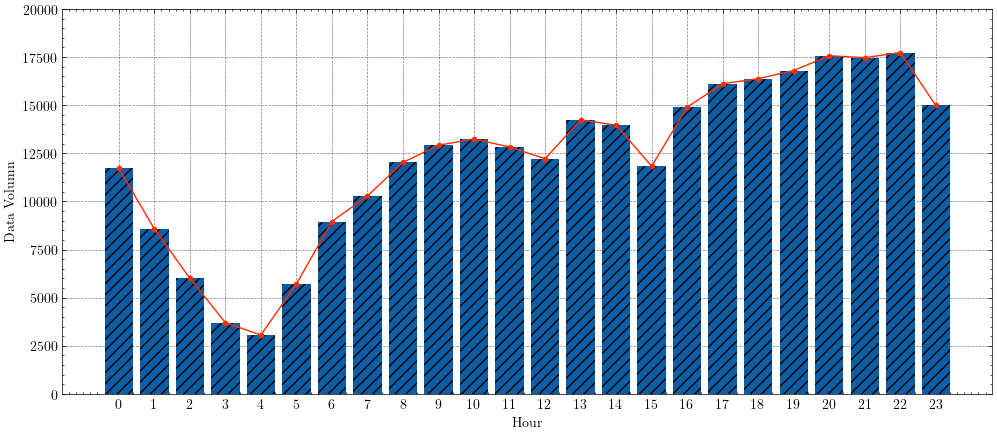

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.bar(x=count_hour.index, height=count_hour.values, hatch='///')
ax.plot(count_hour.index, count_hour.values, color='C3', marker='.')
ax.set_xlabel('Hour')
ax.set_ylabel('Data Volumn')
ax.set_xticks(range(24), range(24))
ax.set_ylim(0, 20000)
plt.show()


## Grid